STEPS TO BUILD A ML MODEL

1. LOAD THE DATA
2. PREPROCESS THE DATA INCLUDING REMOVAL OF Nan Values etc
3. DIVIDING THE DATA INTO TRAINING SET & TESTING SET 
4. TRAIN OUR ML MODEL
5. EVALUATE THE ML MODEL ON THE TEST DATA


In [1]:
import pandas as pd;

In [2]:
dataframe = pd.read_csv("titanic.csv");

In [3]:
dataframe.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0


**SAVING THE PREPROCESSED DATA IN PANDAS**

In [4]:
dataframe.to_csv("titanic2.csv", index=False)

We can Remove Identity Attrbutes like ID, Name , Address etc which add no value to our ML Model

SELECTING ONLY PARTICULAR NUMBER OF COLUMNS FROM VAST DATASET

In [5]:
dataframe.head(1)
#Clearly 13 attribute columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [6]:
dataframe = dataframe[["Survived","Pclass","Sex","Age","SibSp","Embarked","Child"]]       # Notice dataframe[ [] ] Double square brackets

In [7]:
dataframe.head(3)

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,female,38.0,1,C,0
1,1,1,female,35.0,1,S,0
2,0,1,male,54.0,0,S,0


THis is How we Selected only required Attribues and Ignored Others BS

dataframe = dataframe[ ["Column Needed"] ]

**Before sending data to ML MODEL we need all Columns into NUMERIC datatype**

For that we can use LABEL ENCODER

we can change sex of male, female to 0 & 1

Embarked Column also is not present as NUMERIC


LABEL ENCODER is used to create labels in the Columns

Sklearn : The libray for traditional machine learning and preprocessing such as Label Encoder, Standardization & Normalization


In [8]:
import sklearn as sk
from sklearn import preprocessing           # import module preprocessing from sklearn

In [9]:
le = preprocessing.LabelEncoder()           # Instance of Label Encoder Created 

In [11]:
dataframe["Sex"] = le.fit_transform(dataframe["Sex"]) # Using Instance of Label encoder  to call fir_transform method to convert as numeric

In [12]:
dataframe.head(4)           # Successfully Coverted to Numeric 
# 0 Stands for Female, 1 - Male

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,0,38.0,1,C,0
1,1,1,0,35.0,1,S,0
2,0,1,1,54.0,0,S,0
3,1,3,0,4.0,1,S,1


In [13]:
# LET'S convert Embarked also to numeric
le = preprocessing.LabelEncoder()
dataframe["Embarked"] = le.fit_transform(dataframe["Embarked"])

In [14]:
dataframe.head(2)

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,0,38.0,1,0,0
1,1,1,0,35.0,1,2,0


In [16]:
# Lets Keep everything except Survived as Input so keep it on X Axis 
# Survived Gonna be Output so keep it on Y axis 

X =  dataframe.drop("Survived", axis = 1)         # MEntioning of axis as 1 is important as it indicates to drop Column
Y = dataframe["Survived"]

NOW SPLIT DATA INTO TRAINING & TESTING DATA USING model_selection 

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y)

# WE used train_test_split() to split our X & Y columns into 4 variables namely
# X_train Y_train
# X_test  Y_split

**KNN ML MODEL**

In [19]:
 from sklearn.neighbors import KNeighborsClassifier 

model.fit(X,Y) to train our model 

Training the KNN model 

In [21]:
model = KNeighborsClassifier (n_neighbors = 3)        # Got our KNN model in model 
# Here 3 is value of k which is calculated using algo method 
model.fit(X_train,Y_train)              #model.fit(X,Y) will train our model for training datasets 

KNeighborsClassifier(n_neighbors=3)

TESTING THE KNN Model

model.predict(X,Y)

In [22]:
# we will save the predicted values in Y_predicted and then compare it with Y_test to get the accuracy

Y_predicted =   model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print(accuracy_score(Y_predicted, Y_test)*100)

84.78260869565217


===============================================================================================================

### ***DAY 4 OF ML:⏰***

Cross Validation & How to apply it. To Basically avoid the issues of overfiting & generalize the model as well.
An average score of how our model is performing on the dataset

In [25]:
from sklearn.model_selection import cross_val_score

Syntax for Cross_validation_score is cross_val_score(model, input features , output features , Number)

In [26]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model,X,Y, cv=10)          # CV here indicates division factor of our dataset, if its 100 in total, it will be divided into 10 datasets and tested

In [27]:
print(scores*100)

[84.21052632 68.42105263 57.89473684 61.11111111 77.77777778 83.33333333
 66.66666667 77.77777778 66.66666667 55.55555556]


In [28]:
print("Average accuracy of our model is ", scores.mean()*100)

Average accuracy of our model is  69.94152046783626


**HOW TO DECIDE VALUE OF K IN KNEIGHBORS CLASSSIFIER ALGO :)**

WE WILL DISPLAY THE K-VALUE(n_neighbors) vs accuracy_score for each K

In [29]:
k = []      # Empty List to store value of k
acc = []    # Empty List to store value of Accuracy 

for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,Y_train)
  Y_predicted = model.predict(X_test)
  ac = (accuracy_score(Y_predicted, Y_test)*100);
  k.append(i);
  acc.append(ac);

In [30]:
import seaborn as sb


In [31]:
acc

[84.78260869565217,
 52.17391304347826,
 84.78260869565217,
 67.3913043478261,
 76.08695652173914,
 82.6086956521739,
 86.95652173913044,
 78.26086956521739,
 86.95652173913044]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


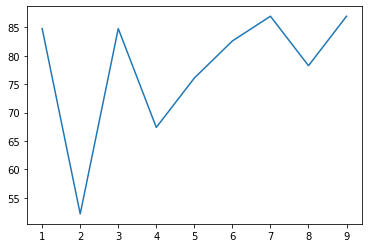

In [32]:
sb.lineplot(k,acc);

Cleary for my model K=1,3,7 is giving same accuracy so doesnt matter choose either of them

In [33]:
model = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(model,X,Y,cv=10)

In [34]:
scores*100

array([68.42105263, 68.42105263, 47.36842105, 61.11111111, 72.22222222,
       55.55555556, 61.11111111, 61.11111111, 61.11111111, 44.44444444])

In [35]:
print(scores.mean()*100)

# for k=2 the accuracy reduced from 69% to 60%

60.08771929824561


In [48]:
for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(model,X,Y, cv=10)
  print("k=",i, end=" ")
  print("Accuracy Avg",scores.mean()*100)

k= 1 Accuracy Avg 73.15789473684211
k= 2 Accuracy Avg 60.08771929824561
k= 3 Accuracy Avg 69.94152046783626
k= 4 Accuracy Avg 61.754385964912274
k= 5 Accuracy Avg 68.30409356725147
k= 6 Accuracy Avg 63.859649122807014
k= 7 Accuracy Avg 68.30409356725146
k= 8 Accuracy Avg 65.46783625730994
k= 9 Accuracy Avg 72.63157894736841


Our Model will Perform best on Value of k=1

cv should be greater than 5 

The more the cv, more the Precision

But Very High CV's are Computationally Expensive

**Class Imbalance:** Occurs When one Class is present in Majority over Other

Classes are said to be Imbalanced if Threshold difference Between both classes is around 60% ~ 40% [60% to 40%]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


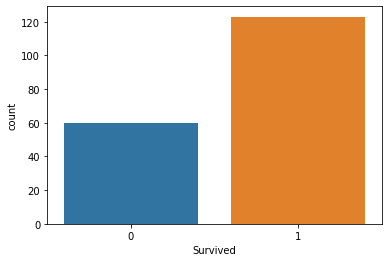

In [51]:
sb.countplot(dataframe["Survived"]);


Class 1 is present in 120, while the later in 60 
50% Difference 
Hence Imbalance

## **Playing With Telecom DataSet Now**

TO show class imbalance Effect

In [52]:
df = pd.read_csv("telecom_churn (1).csv")

In [53]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [55]:
from sklearn.preprocessing import LabelEncoder        # Converting the Churn Column to Numeric using Label Encoder
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

In [56]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [57]:
df.columns        # We will take everyhing as input from Number of Vmail Messages

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [59]:
df = df[['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn']]

In [60]:
df.head(3)

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


Now we will Try Predicting CHurn 

In [61]:
  X = df[['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']]

  Y = df[["Churn"]]

In [62]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)
# Indicating that test size must be 20 and Train Size must be 80 

In [63]:
model = KNeighborsClassifier(n_neighbors=3 )
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(accuracy_score(Y_predict,Y_test)*100)


87.25637181409296


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


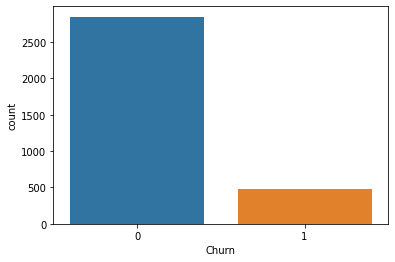

In [64]:
sb.countplot(df["Churn"])

0 is PResent in Monsterous Quantity. Hence our Machine Learning Model will learn that for every input lets give 0 as Output :(

  There are not Enough Training Examples for 1

In [65]:
Y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

**See Huge Number of 0's Present :(**